In [2]:
import librosa
import numpy as np

# 1. Get the file path to an included audio example
filename = 'drive/MyDrive/Colab Notebooks/audios/stayin-alive-100bpm-30s.mp3'

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Compute onset strength with very low sensitivity
# onset_env = librosa.onset.onset_strength(y=y, sr=sr,aggregate=np.median,
                                        # hop_length=2048,  # Increase hop_length
                                         #n_fft=4096)       # Decrease n_fft

onset_env = librosa.onset.onset_strength(y=y, sr=sr,aggregate=np.median)


# 4. Run the beat tracker with the modified onset envelope
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 5. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beats, sr=sr)

print(beat_times)


Estimated tempo: 103.36 beats per minute
[  0.90557823   1.4860771    2.06657596   2.64707483   3.2275737
   3.80807256   4.38857143   4.96907029   5.54956916   6.13006803
   6.71056689   7.29106576   7.87156463   8.45206349   9.03256236
   9.61306122  10.19356009  10.77405896  11.35455782  11.93505669
  12.51555556  13.09605442  13.67655329  14.25705215  14.83755102
  15.41804989  15.99854875  16.57904762  17.15954649  17.74004535
  18.32054422  18.90104308  19.48154195  20.06204082  20.64253968
  21.22303855  21.80353741  22.38403628  22.96453515  23.54503401
  24.10231293  24.68281179  25.26331066  25.84380952  26.42430839
  27.00480726  27.58530612  28.16580499  28.74630385  29.32680272
  29.90730159  30.48780045  31.06829932  31.64879819  32.22929705
  32.80979592  33.39029478  33.97079365  34.55129252  35.13179138
  35.71229025  36.29278912  36.87328798  37.45378685  38.03428571
  38.61478458  39.19528345  39.77578231  40.35628118  40.93678005
  41.51727891  42.09777778  42.65505

In [3]:

import essentia.standard as es
from tempfile import TemporaryDirectory

# Loading an audio file.
audio = es.MonoLoader(filename='drive/MyDrive/Colab Notebooks/audios/stayin-alive-100bpm-30s.mp3')()

#audio = es.EasyLoader(filename='drive/MyDrive/Colab Notebooks/audios/from_scratch_composer-30s.mp3',sampleRate=44100, startTime=00, endTime=10)()

# Compute beat positions and BPM.
rhythm_extractor = es.RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
print("Beat positions (sec.):", beats)
print("Beat estimation confidence:", beats_confidence)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 26.3 MB/s eta 0:00:00
BPM: 103.42765808105469
Beat positions (sec.): [  0.62693876   1.2538775    1.8808163    2.507755     3.1695237
   3.7616327    4.3421316    4.9226303    5.503129     6.083628
   6.664127     7.2446256    7.8251247    8.405623     8.986122
   9.566621    10.1471195   10.727619    11.308118    11.888617
  12.469115    13.049614    13.630114    14.210612    14.791111
  15.36        15.928888    16.509388    17.089886    17.670385
  18.250883    18.831383    19.411882    19.99238     20.57288
  21.153378    21.733877    22.314377    22.894875    23.475374
  24.055872    24.636372    25.21687     25.797369    26.377869
  26.958366    27.538866    28.119364    28.699863    29.280363
  29.86086     30.44136     31.021858    31.602358    32.182858
  32.763355    33.343853    33.924355    34.504852    35.08535
  35.665848    36.24635     36.826847    37.407345    37.987846
  38.556732    39.12562     39.706123    

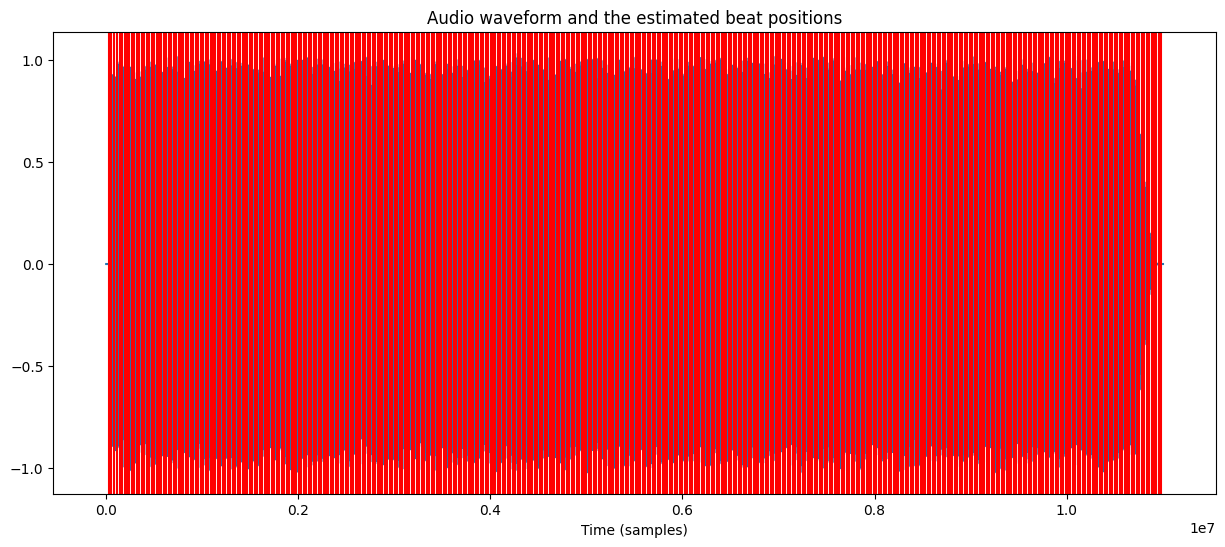

In [4]:
# Mark beat positions in the audio and write it to a file.
# Use beeps instead of white noise to mark them, as it is more distinctive.
marker = es.AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audio)

# Write to an audio file in a temporary directory.
temp_dir = TemporaryDirectory()
es.MonoWriter(filename=temp_dir.name + '/dubstep_beats.flac')(marked_audio)

from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6)

plot(audio)
for beat in beats:
    plt.axvline(x=beat*44100, color='red')
plt.xlabel('Time (samples)')
plt.title("Audio waveform and the estimated beat positions")
show()